<a href="https://colab.research.google.com/github/anirudh217sharma/House_Prices_Advanced_Regression_Techniques/blob/main/House_Prices_Advanced_Regression_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color=orange>**Kaggle Knowledge Comp1 : House Prices - Advanced Regression Techniques **</font>

In [1]:
# Import the pandas library for data manipulation and analysis
import pandas as pd

# Import the numpy library for numerical computing
import numpy as np

# Import the matplotlib library for creating visualizations
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
plt.style.use('Solarize_Light2')

# Import the seaborn library for advanced visualizations
import seaborn as sns

# Import the scikit-learn library for machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import Ridge

# Import the scipy library for scientific computing
import scipy as sp

# Import the statsmodels library for statistical modeling
import statsmodels.api as sm

# Import the patsy library for building statistical models
import patsy

import plotly.express as px

# Interactive dataframe - a collab feature
from google.colab import data_table
data_table.enable_dataframe_formatter()

# Auto ML Library
# Trying an autgluon model just as a benchmark without any preprocessing
# !pip install autogluon

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing

from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, LassoCV, LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectFromModel, RFE, RFECV
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from collections import Counter
import itertools
from sklearn.model_selection import GridSearchCV
# import autogluon as ag
# Import necessary libraries
# from autogluon.tabular import TabularPredictor

In [2]:
# !pip uninstall autogluon.core
# !pip uninstall autogluon
# !pip install autogluon

In [3]:
# Run this cell to connect to your Drive folder

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
data_dir = 'gdrive/MyDrive/Academics-UIUC/House Prices/house-prices-advanced-regression-techniques'
train = pd.read_csv(data_dir + '/train.csv')
test  = pd.read_csv(data_dir + '/test.csv')

In [5]:
print(f'Number of trainaing examples : {len(train)}')
print(f'Number of validation examples : {len(test)}')

Number of trainaing examples : 1460
Number of validation examples : 1459


EDA

In [6]:


print(f'The shape of the training dataset is : {train.shape}')
print(f'The shape of the test dataset is : {test.shape}')

The shape of the training dataset is : (1460, 81)
The shape of the test dataset is : (1459, 80)


In [7]:

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [9]:
# Checking the Missing Value Percentage for each column
def missing_percentage(df):
  """
  Calculates the missing values percentage for each column in a pandas dataframe.

  Args:
      df: A pandas dataframe.

  Returns:
      A pandas Series containing the missing values percentage for each column.
  """

  missing_values = df.isna().sum()
  total_values = len(df)
  missing_percentages = (missing_values / total_values) * 100
  return pd.DataFrame(missing_percentages,columns=['Missing %'])

missing_df = missing_percentage(train)
missing_df = missing_df[missing_df['Missing %'] > 0]
missing_df

,Missing %
LotFrontage,17.739726
Alley,93.767123
MasVnrType,59.726027
MasVnrArea,0.547945
BsmtQual,2.534247
BsmtCond,2.534247
BsmtExposure,2.602740
BsmtFinType1,2.534247
BsmtFinType2,2.602740
Electrical,0.068493


In [10]:
# There are columns with significantly high missing values which can defenitely be dropped such as
# MiscFeature, Alley, Fence. FirePlaceQu & Lot Percetage can be explored to see if any treatment is possible
# Other Columns can be imputed most likely

In [11]:
# Dropping the three columns
train = train.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1)
missing_df = missing_percentage(train)
missing_df = missing_df[missing_df['Missing %'] > 0]
missing_df

,Missing %
LotFrontage,17.739726
MasVnrType,59.726027
MasVnrArea,0.547945
BsmtQual,2.534247
BsmtCond,2.534247
BsmtExposure,2.602740
BsmtFinType1,2.534247
BsmtFinType2,2.602740
Electrical,0.068493
FireplaceQu,47.260274


In [12]:
print(train['FireplaceQu'].unique()) # It's a categorical column with almost 50 % of missing values better to drop it as well
train = train.drop(['FireplaceQu'],axis=1)
missing_df = missing_percentage(train)
missing_df = missing_df[missing_df['Missing %'] > 0]
missing_df


[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']


,Missing %
LotFrontage,17.739726
MasVnrType,59.726027
MasVnrArea,0.547945
BsmtQual,2.534247
BsmtCond,2.534247
BsmtExposure,2.602740
BsmtFinType1,2.534247
BsmtFinType2,2.602740
Electrical,0.068493
GarageType,5.547945


In [13]:
def print_column_types(df):
  """
  Prints which columns in a pandas dataframe are categorical and which are numerical.

  Args:
      df: A pandas dataframe.
  """

  categorical_cols = []
  numerical_cols = []

  for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
      numerical_cols.append(col)
    else:
      categorical_cols.append(col)

  print("Categorical columns:", len(categorical_cols))
  print("Numerical columns:", len(numerical_cols))

  return categorical_cols, numerical_cols

catCol, numCol = print_column_types(train)

Categorical columns: 38
Numerical columns: 38


In [14]:
# Getting the actual categorical/numerical columns which requires imputation dict()
imputation_dict = dict()

for col in missing_df.index:
  if col in catCol:
    imputation_dict[col] = 'Categorical'
  elif col in numCol:
    imputation_dict[col] = 'Numerical'

print(imputation_dict)
print(len(imputation_dict.keys()))
print(len(missing_df.index))

{'LotFrontage': 'Numerical', 'MasVnrType': 'Categorical', 'MasVnrArea': 'Numerical', 'BsmtQual': 'Categorical', 'BsmtCond': 'Categorical', 'BsmtExposure': 'Categorical', 'BsmtFinType1': 'Categorical', 'BsmtFinType2': 'Categorical', 'Electrical': 'Categorical', 'GarageType': 'Categorical', 'GarageYrBlt': 'Numerical', 'GarageFinish': 'Categorical', 'GarageQual': 'Categorical', 'GarageCond': 'Categorical'}
14
14


In [15]:
"""
Imputation method - using median for numerical columns & mode for Categorical columns

TODO-> Other methods can be tried later on to see how it affects the model performance

"""

def impute_missing_values(df, impute_dict):
  """
  Imputes missing values in a pandas dataframe using the provided dictionary.

  Args:
      df: A pandas dataframe.
      impute_dict: A dictionary with keys as column names and values as either
          "Categorical" or "Numerical".

  Returns:
      A pandas dataframe with imputed missing values.
  """

  for column, imputation_type in impute_dict.items():
    if imputation_type == "Categorical":
      df[column] = df[column].fillna(df[column].mode()[0])
    elif imputation_type == "Numerical":
      df[column] = df[column].fillna(df[column].median())
    else:
      raise ValueError(f"Invalid imputation type: {imputation_type}")

  return df

train_imputed = impute_missing_values(train.copy(), imputation_dict)
train_imputed.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [16]:
# Checking the Missing Dataframe again to see if the imputation worked as expected
missing_df = missing_percentage(train_imputed)
missing_df

,Missing %
Id,0.0
MSSubClass,0.0
MSZoning,0.0
LotFrontage,0.0
LotArea,0.0
...,...
MoSold,0.0
YrSold,0.0
SaleType,0.0
SaleCondition,0.0


In [17]:
# Dropping the id column as that doesn't add any value
train_imputed = train_imputed.drop(['Id'],axis=1)
numCol = numCol[1:]
print(numCol)
train_imputed

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [18]:
# Create a correlation matrix
correlation_matrix = train_imputed[numCol].corr()

# Create a heatmap using plotly express
fig = px.imshow(correlation_matrix, text_auto=True, color_continuous_scale="RdBu")

# Update the layout
fig.update_layout(
    title="Correlation Plot of Numerical Features",
    xaxis_title="Features",
    yaxis_title="Features",
)

# Show the plot
fig.show()

In [19]:
train_imputed

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


Lets Split the Categorical & numerical features so that we can dive deep into the Nature of the Categorical features & handle them appropriately

In [20]:
trainCat = train_imputed[catCol]
trainNum = train_imputed[numCol]

In [21]:
trainCat.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


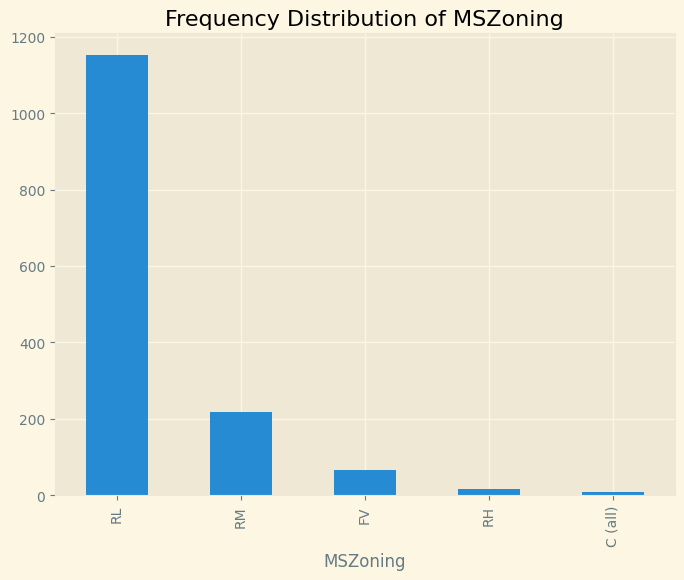

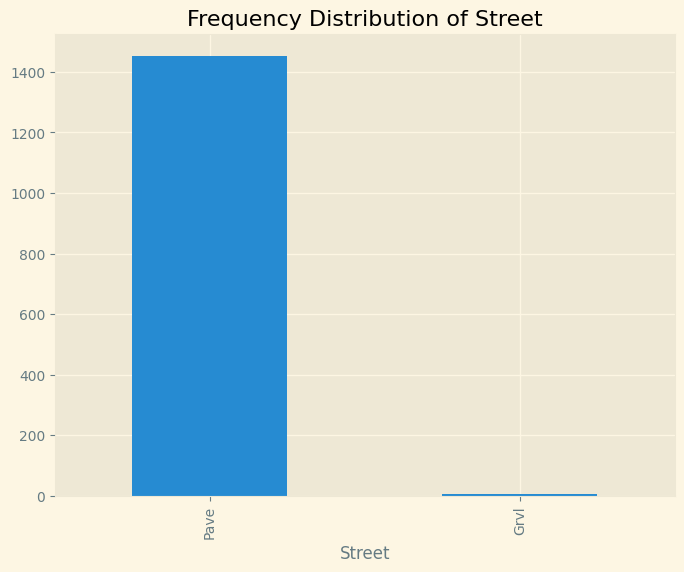

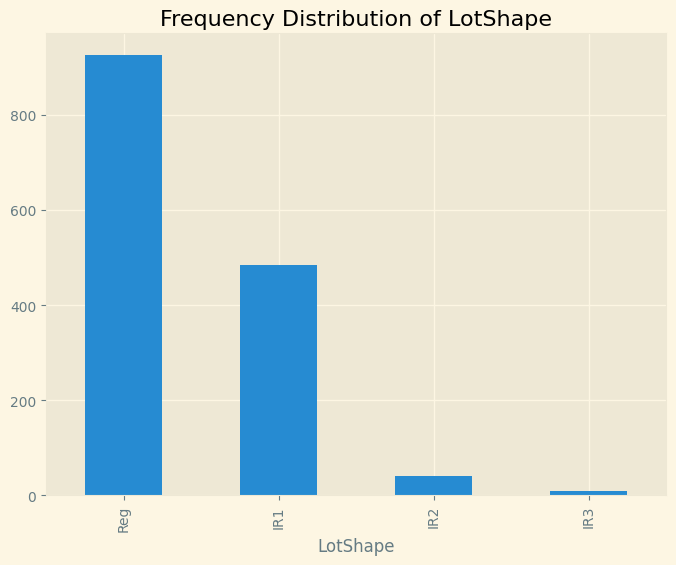

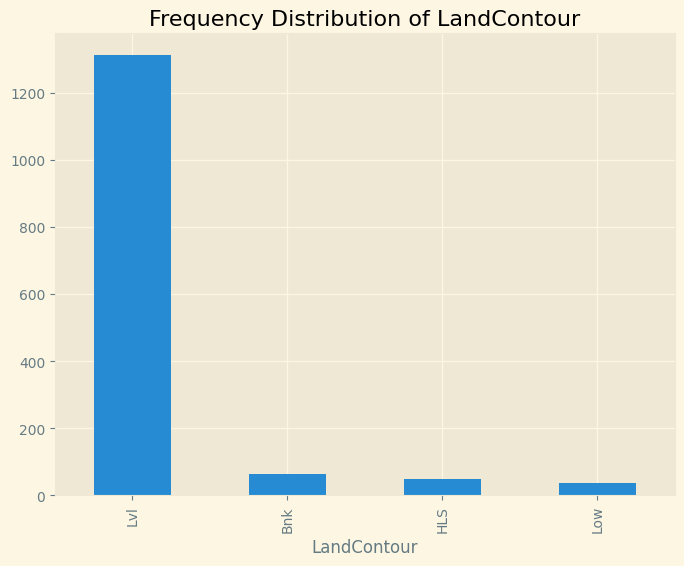

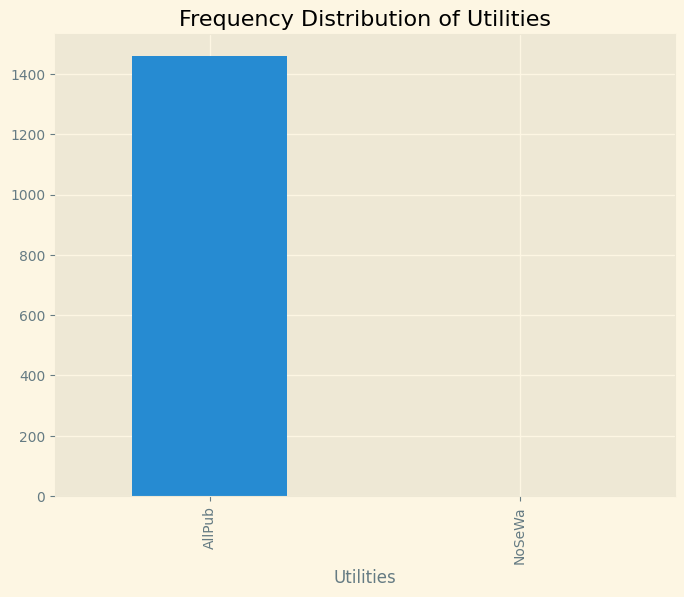

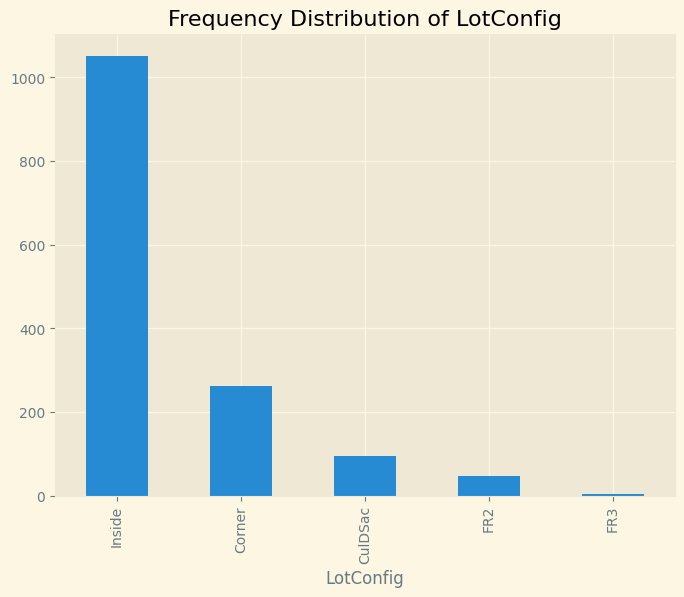

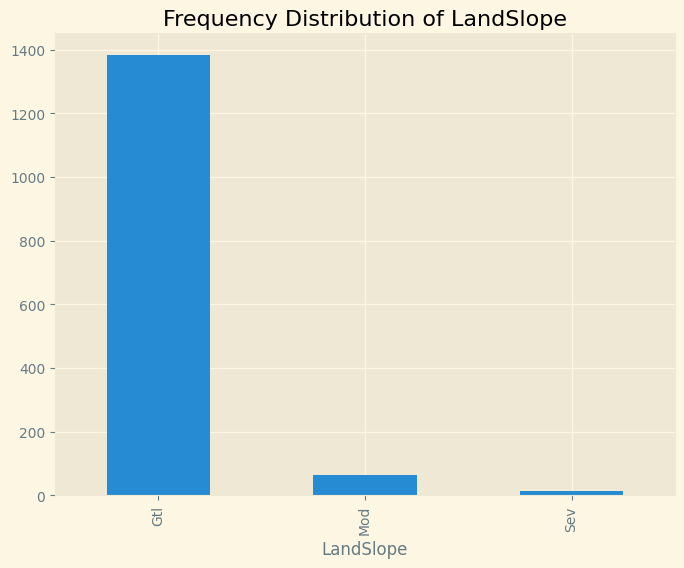

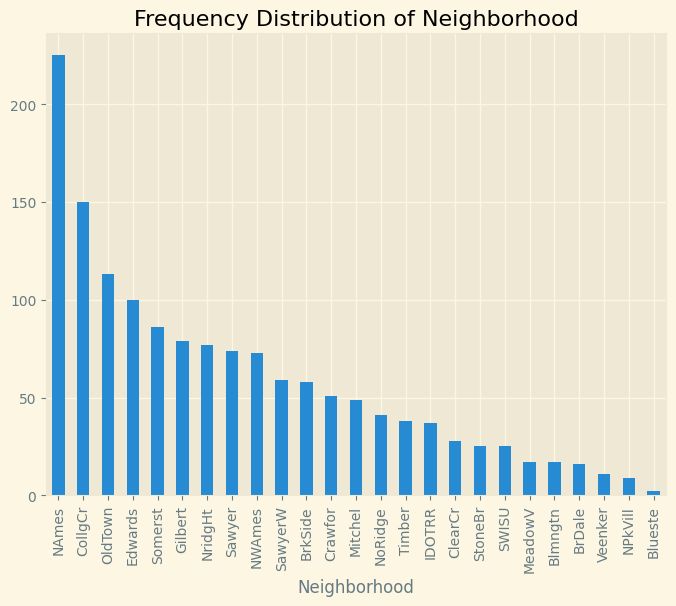

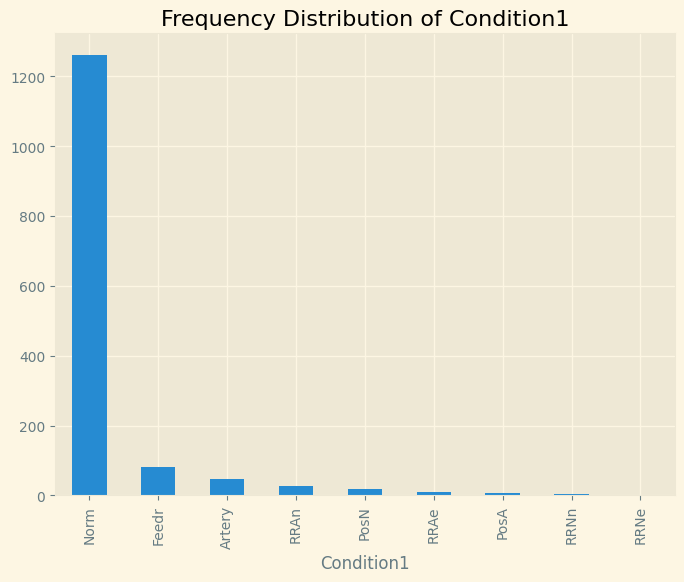

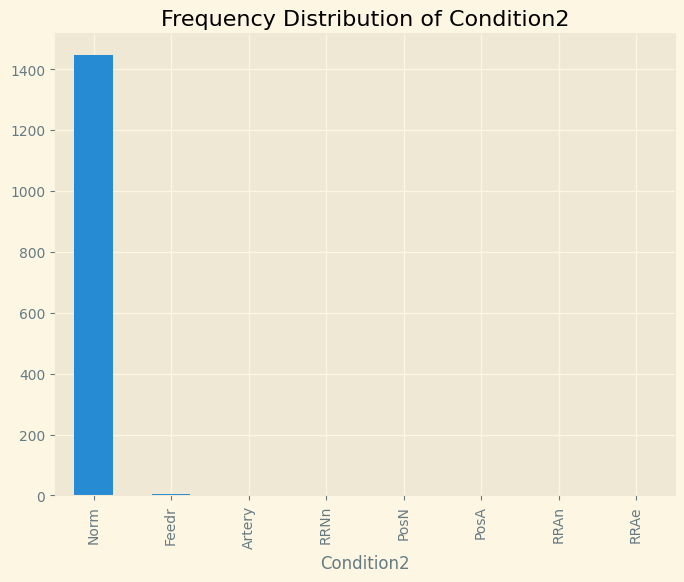

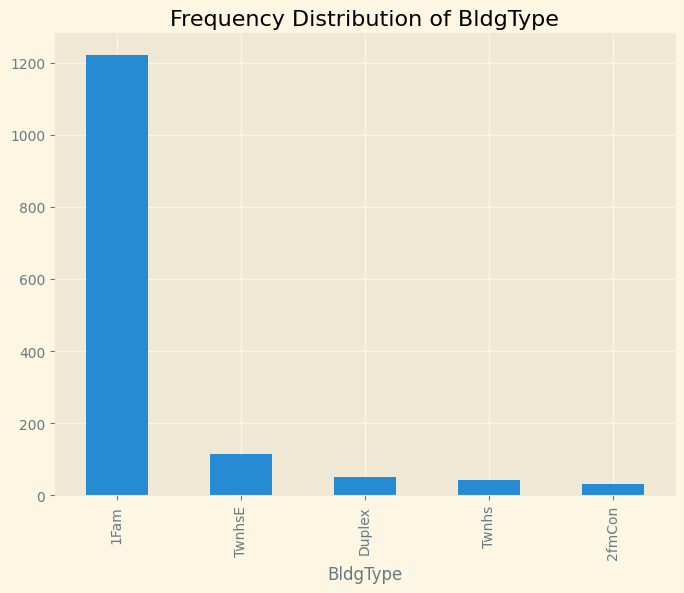

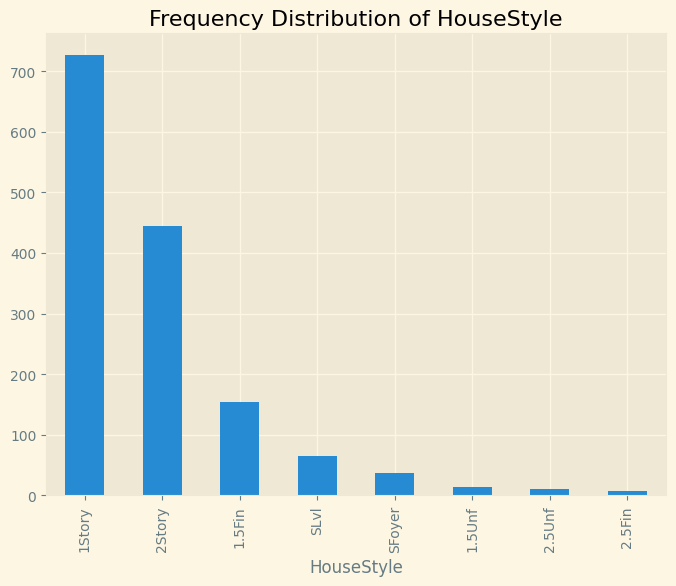

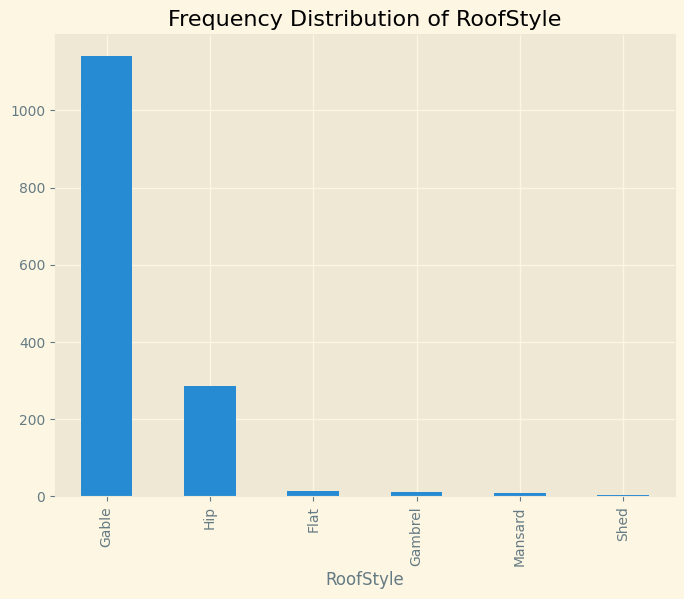

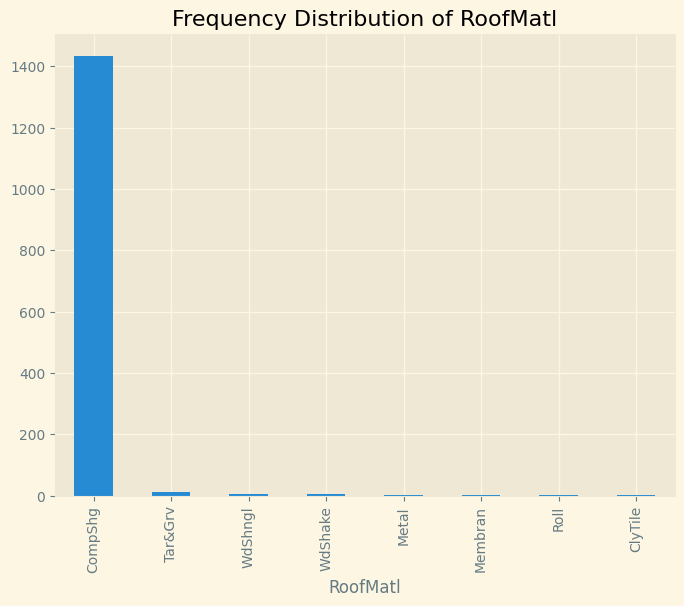

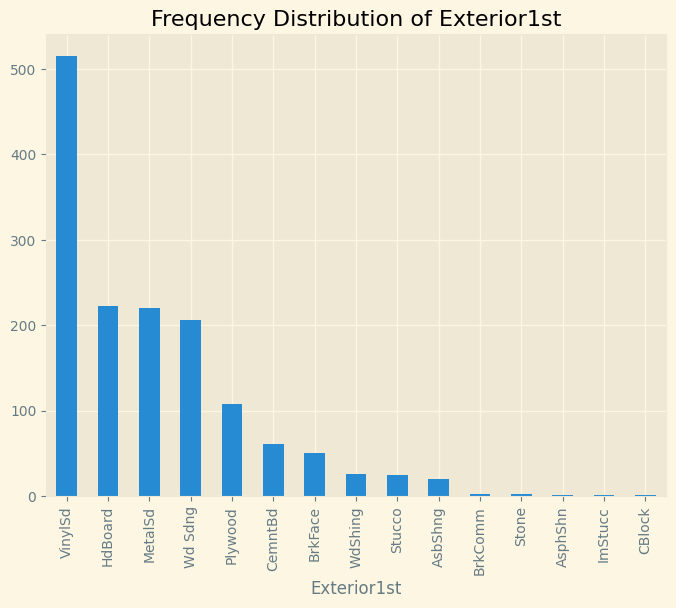

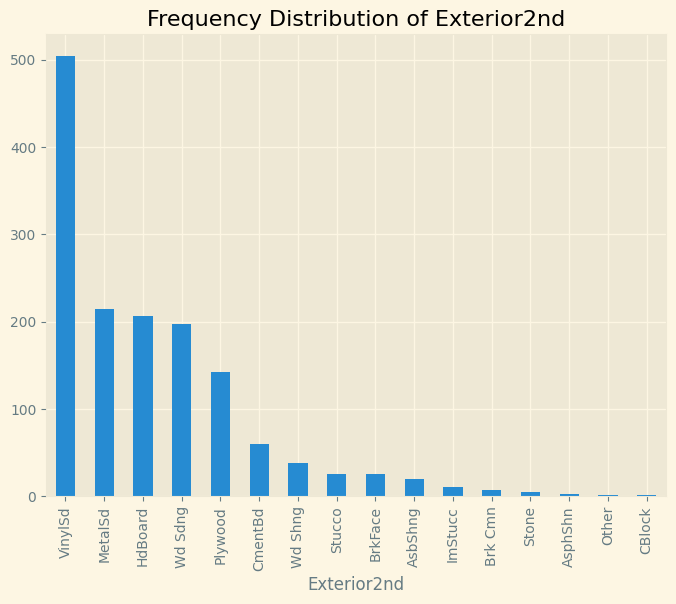

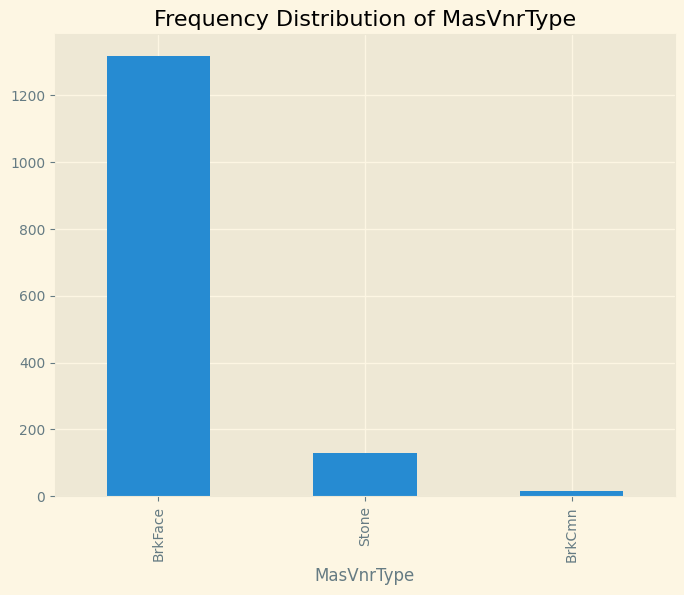

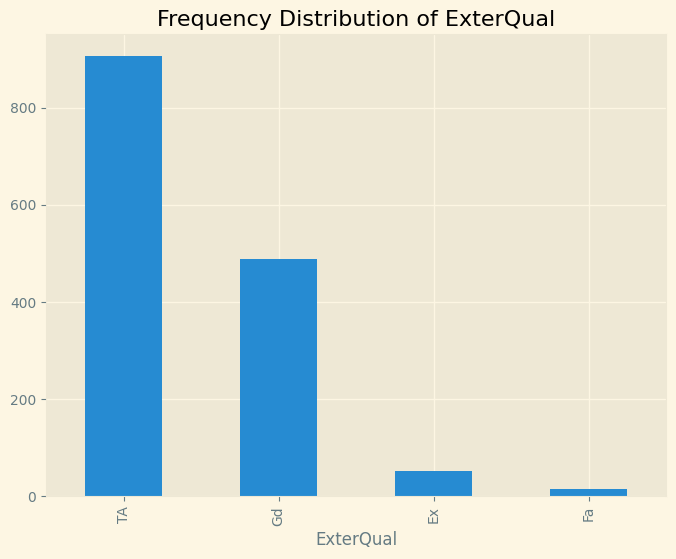

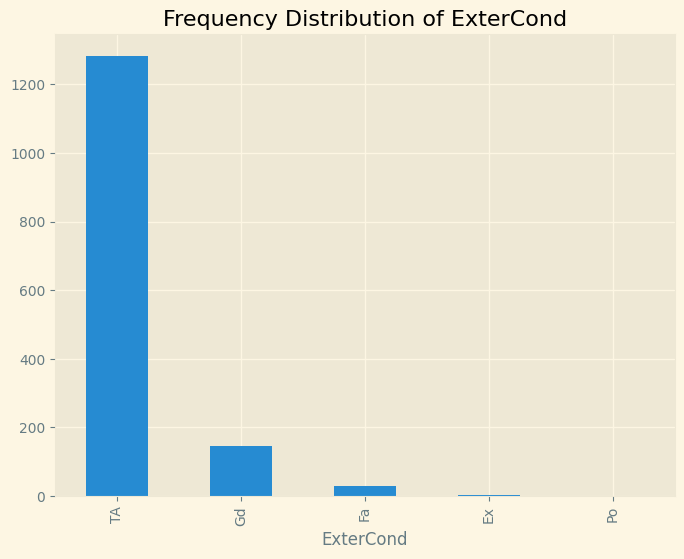

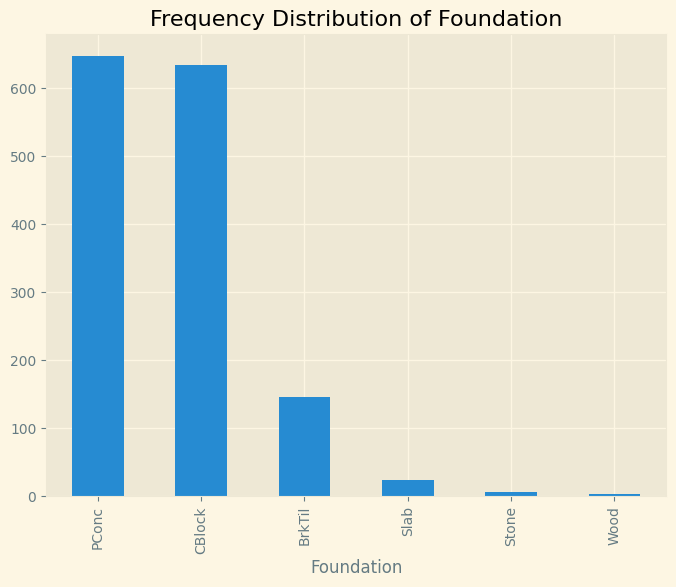

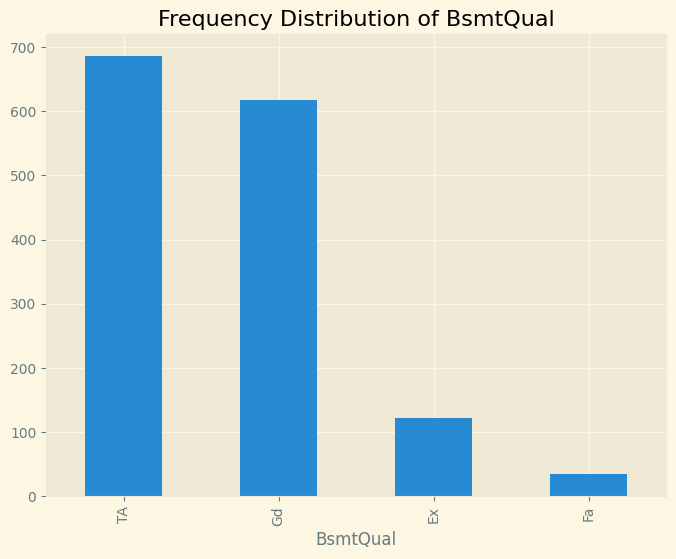

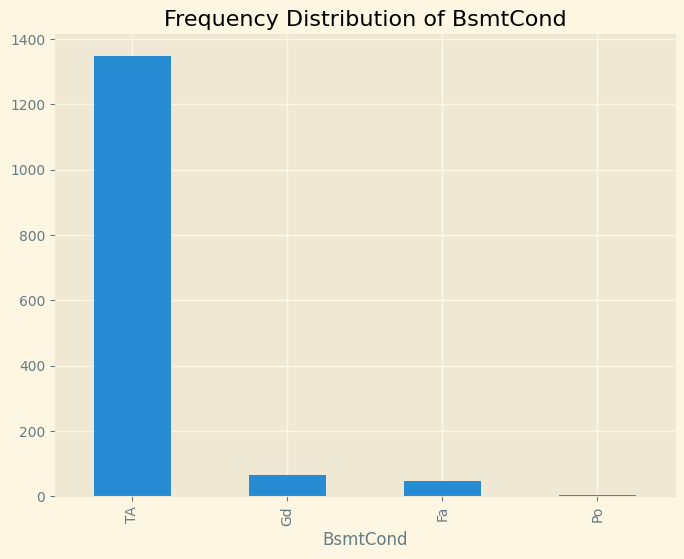

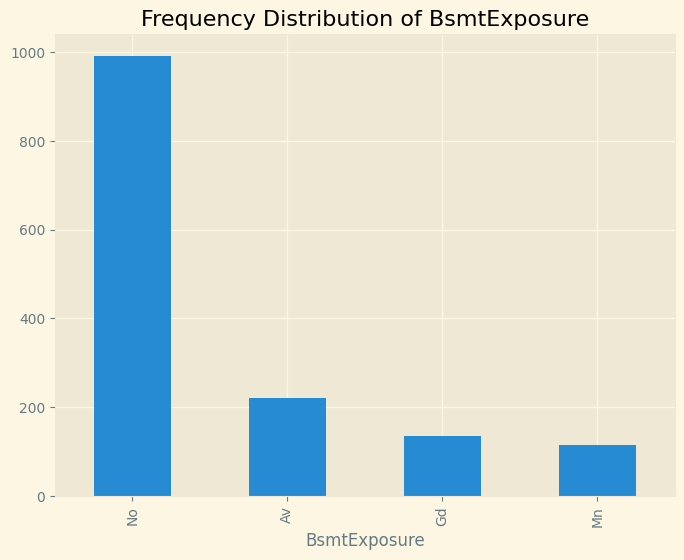

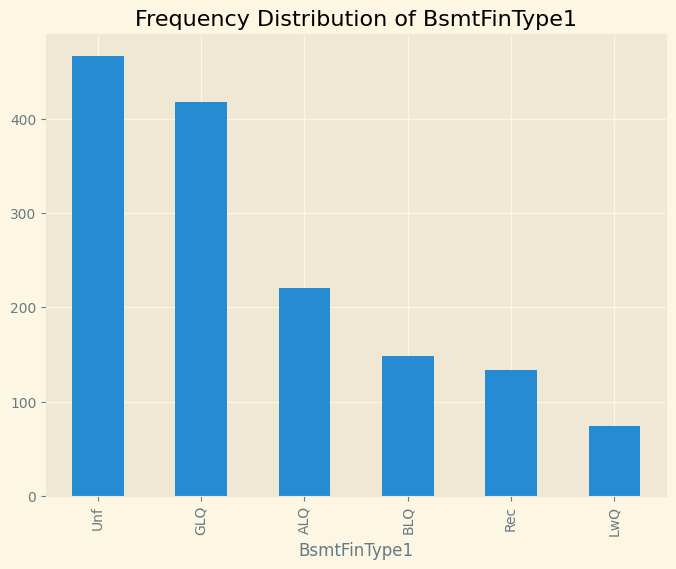

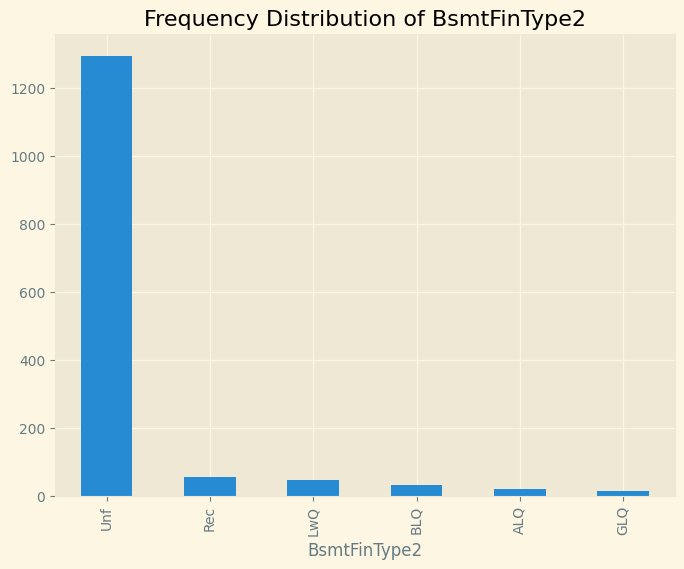

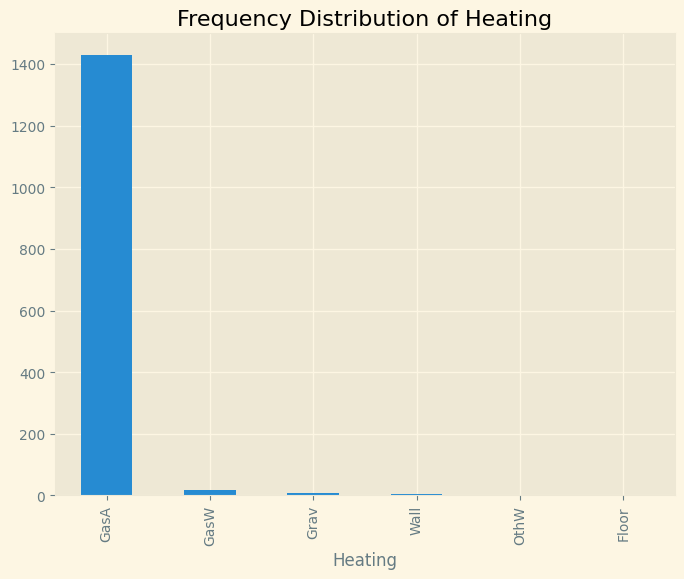

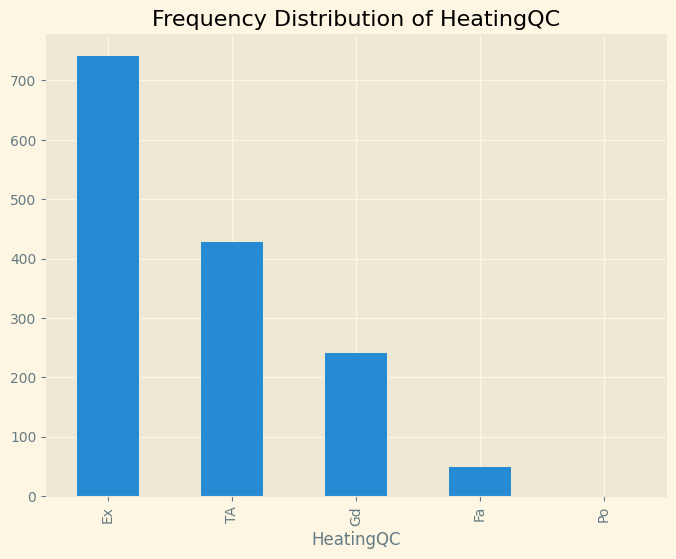

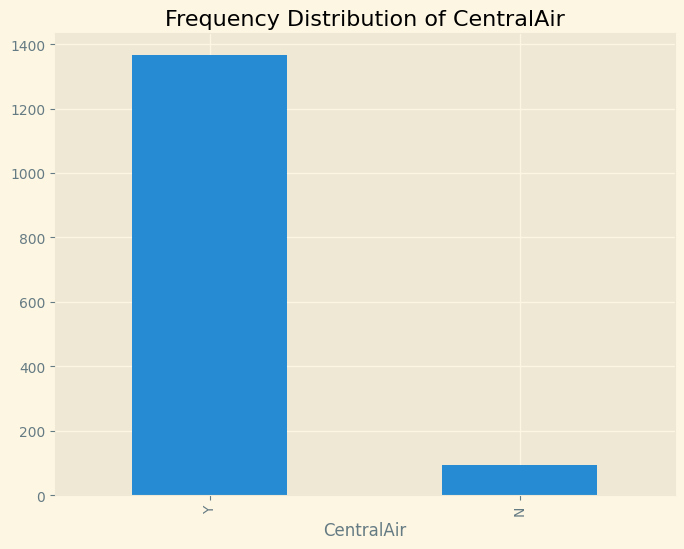

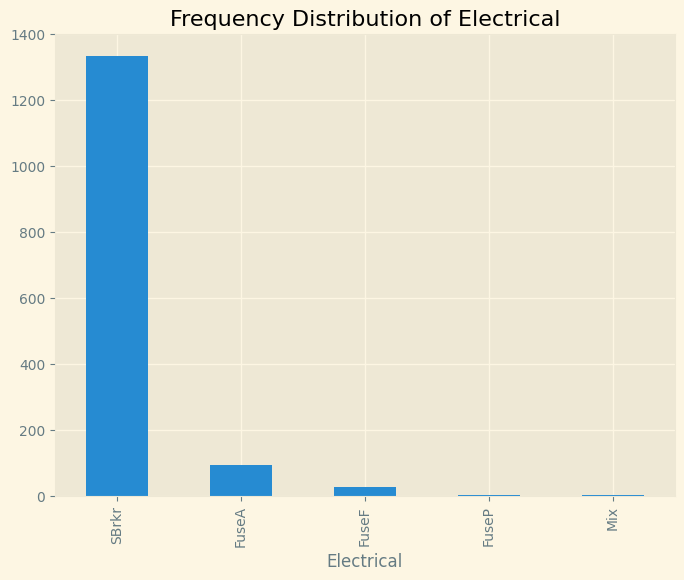

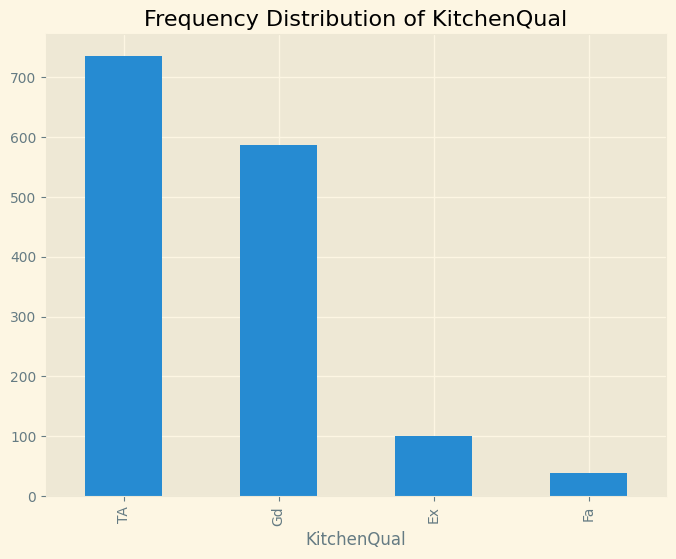

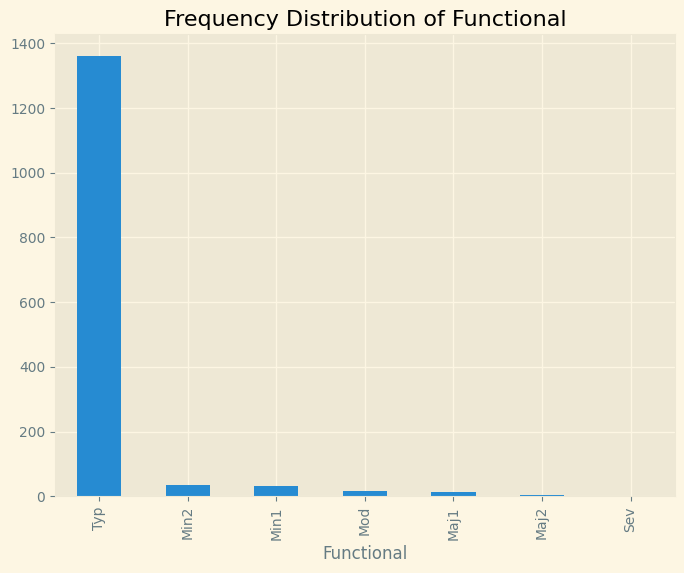

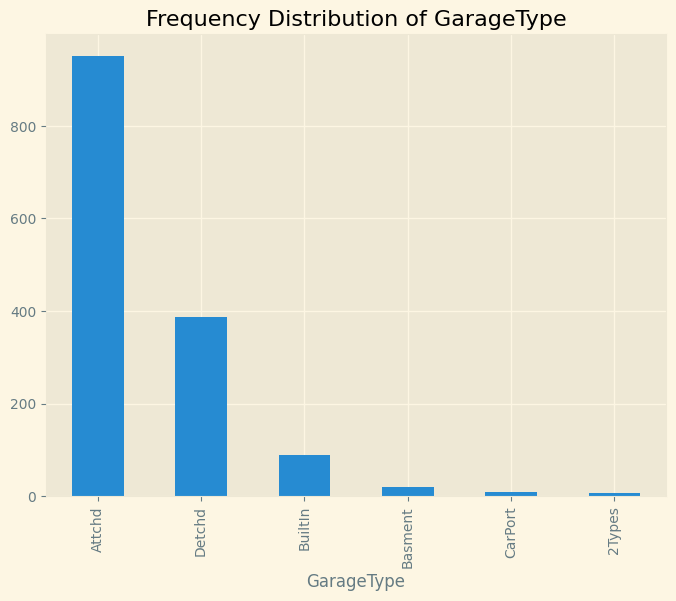

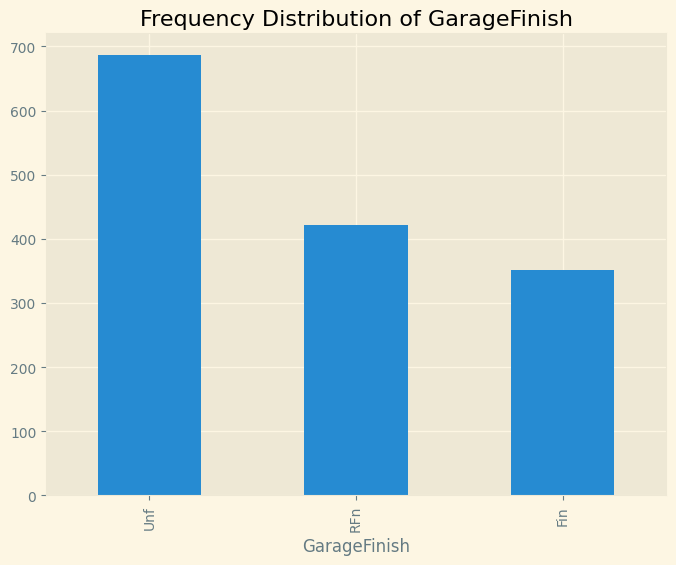

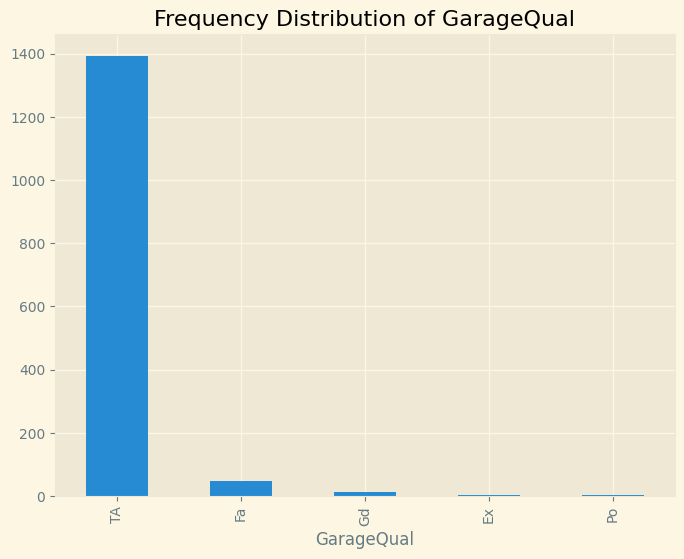

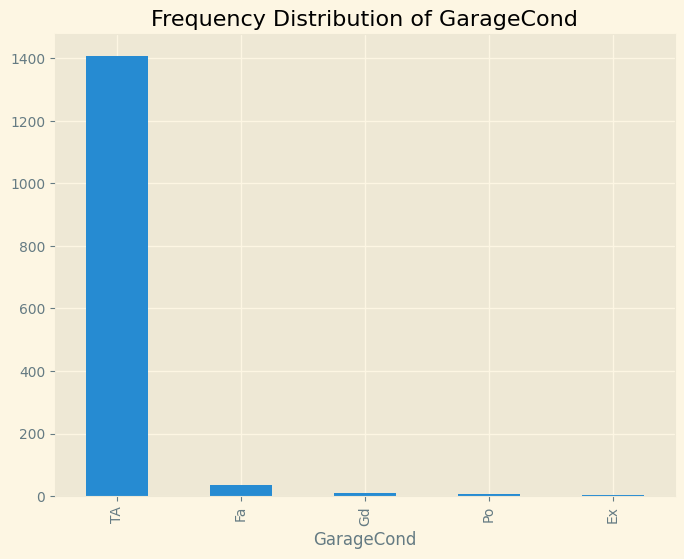

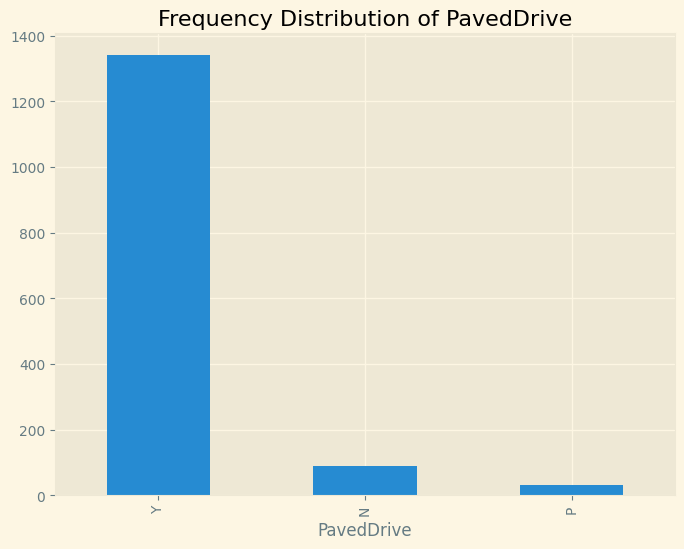

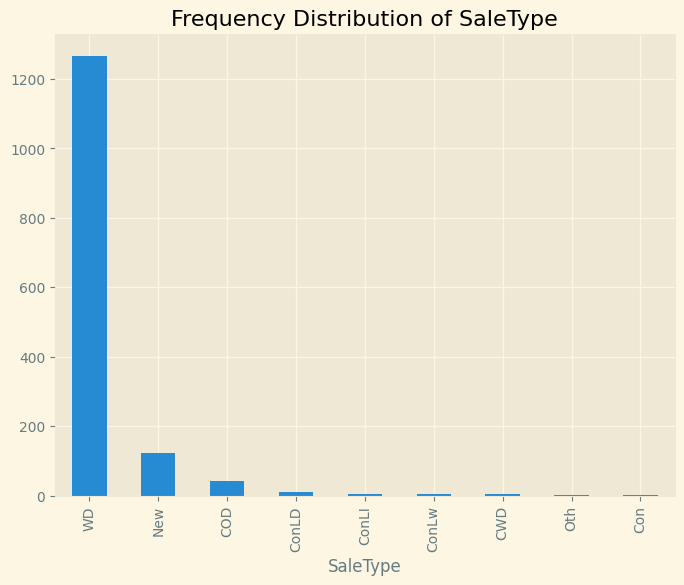

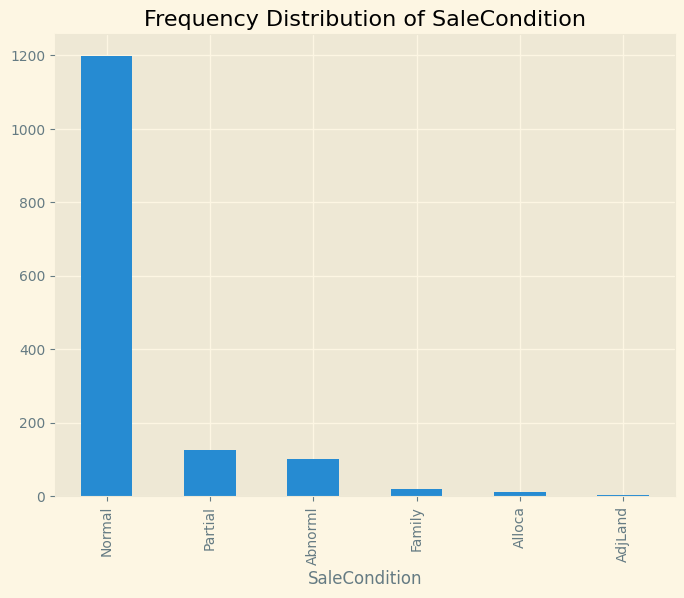

In [22]:
# Checking the Frequency Distribution of the Categorical columns
for column in trainCat.columns:
    plt.figure(figsize=(8, 6))
    trainCat[column].value_counts().plot(kind='bar')
    plt.title(f'Frequency Distribution of {column}')
    plt.show()

In [23]:
# Checking the Cardinality of the Categorical features
cardinality = trainCat.nunique()
print(cardinality.sort_values(ascending=False))

Neighborhood     25
Exterior2nd      16
Exterior1st      15
SaleType          9
Condition1        9
Condition2        8
HouseStyle        8
RoofMatl          8
Functional        7
Foundation        6
GarageType        6
Heating           6
BsmtFinType2      6
BsmtFinType1      6
SaleCondition     6
RoofStyle         6
BldgType          5
GarageCond        5
GarageQual        5
Electrical        5
LotConfig         5
HeatingQC         5
ExterCond         5
MSZoning          5
BsmtExposure      4
BsmtCond          4
BsmtQual          4
KitchenQual       4
LandContour       4
ExterQual         4
LotShape          4
LandSlope         3
MasVnrType        3
GarageFinish      3
PavedDrive        3
CentralAir        2
Street            2
Utilities         2
dtype: int64


In [24]:
# Doing One Hot encoding
print(trainCat.shape)
trainCat_encoded = pd.get_dummies(trainCat, columns=list(trainCat.columns))
# Convert to numeric
trainCat_encoded = trainCat_encoded.astype(int)
print(trainCat_encoded.shape)
trainCat_encoded.head()

(1460, 38)
(1460, 233)


,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0


TODO-> Try Dimmensional reduction techniques such as PCA OR TSNE

In [25]:
pass

In [26]:
def out_iqr(s, k=1.5, return_thresholds=False):
    """
    Return a boolean mask of outliers for a series using interquartile range, works column-wise.
    param k:
        some cutoff to multiply by the iqr
    :type k: ``float``
    param return_thresholds:
        True returns the lower and upper bounds, good for plotting.
        False returns the masked array
    :type return_thresholds: ``bool``
    """
    # calculate interquartile range
    q25, q75 = np.percentile(s, 25), np.percentile(s, 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * k
    lower, upper = q25 - cut_off, q75 + cut_off
    if return_thresholds:
        return lower, upper
    else: # identify outliers
        return [True if x < lower or x > upper else False for x in s]

In [27]:
outlier = True

In [28]:
if outlier:
    temp_df = trainNum
    df2 = trainNum
    iqr1 = df2.apply(out_iqr, k=1.5)  # We are using a value of 3 to determine only the far extreme outliers

    for column in df2:
        df2[column] = np.where(iqr1[column] == True, 'NaN', df2[column])
        cols = df2.columns
        df2[cols] = df2[cols].apply(pd.to_numeric, errors='coerce')
    else:
        iqr1 = df2  # use this block if you don't want to treat outliers

    # Fill any remaining nulls
    trainNum = df2.interpolate(method='bfill', axis=0)
trainNum.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003,196.0,706.0,0.0,...,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2,2008,208500.0
1,20.0,80.0,9600.0,6.0,5.0,1976.0,1976,0.0,978.0,0.0,...,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5,2007,181500.0
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002,162.0,486.0,0.0,...,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9,2008,223500.0
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970,0.0,216.0,0.0,...,0.0,35.0,0.0,0.0,0.0,0.0,0.0,2,2006,140000.0
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000,350.0,655.0,0.0,...,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12,2008,250000.0


In [29]:
# Combining the Categorical & Numerical features back together
train = pd.concat([trainCat_encoded,trainNum],axis=1)
print(train.shape)
train.head()

(1460, 270)


,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0,0,0,1,0,0,1,0,0,0,...,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2,2008,208500.0
1,0,0,0,1,0,0,1,0,0,0,...,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5,2007,181500.0
2,0,0,0,1,0,0,1,1,0,0,...,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9,2008,223500.0
3,0,0,0,1,0,0,1,1,0,0,...,0.0,35.0,0.0,0.0,0.0,0.0,0.0,2,2006,140000.0
4,0,0,0,1,0,0,1,1,0,0,...,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12,2008,250000.0


TODO-> Standardization of numerical varaibles might improve the result further

In [30]:
# Dropping missing values from the one hot encoded columns if any
train = train.dropna()

In [31]:
target_column = 'SalePrice'

# Separate features and target variable
X = train.drop(target_column, axis=1)
y = train[target_column]

# Split the data into a training set (80%) and a test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Check the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1312, 269)
X_test shape: (146, 269)
y_train shape: (1312,)
y_test shape: (146,)


Feature Selection

In [32]:
# Below we define the threshold for each feature selection approach
topN_features = 6
corr_threshold = 0.7
rfe_steps = 10
rfe_verbose = 5

# Setup new dict used to store selected features from each Feature Selection approach
top_features = dict()

In [33]:
#1.Select the top n features based on feature importance from random forest

# define the model
model = RandomForestRegressor(random_state=42)
# fit the model
model.fit(X_train, y_train)
# get importance
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)

# Store Top N Features from Random Forest (Select Features with highest feature importance)
top_features['RF_Regressor'] = pd.DataFrame(feat_importances.nlargest(topN_features)).axes[0].tolist()
top_features['RF_Regressor']

['OverallQual',
 'GrLivArea',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'BsmtFinSF1']

In [34]:
# Select the top n features based on absolute correlation with target variable
corr_data1 = pd.concat([X_train, y_train], axis = 1)
corr_data = corr_data1.corr()
corr_data = corr_data.iloc[: , [0]]
corr_data.columns.values[0] = "Correlation"
corr_data = corr_data.iloc[corr_data.Correlation.abs().argsort()]
corr_data = corr_data[corr_data['Correlation'].notna()]
corr_data = corr_data.loc[corr_data['Correlation'] != 1]

# Select Top N Features with greater than 70% absolute correlation
corr_data2 = corr_data.loc[corr_data['Correlation'].abs() > corr_threshold]
top_features['ABS_Correlation'] = corr_data2.axes[0].tolist()
top_features['ABS_Correlation']

[]

In [35]:
estimator = LassoCV(cv=5, random_state=42)

sfm = SelectFromModel(estimator, prefit=False, norm_order=1, max_features=topN_features)

sfm.fit(X_train, y_train)

feature_idx = sfm.get_support()
top_features['Lasso_Features'] = X_train.columns[feature_idx].tolist()
top_features['Lasso_Features']

['YearBuilt',
 'YearRemodAdd',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF']

In [36]:
# Select the top n features based on RFE
rfe_selector = RFE(estimator=LinearRegression(), n_features_to_select=topN_features, step=rfe_steps, verbose=rfe_verbose)
rfe_selector.fit(X_train, y_train)
rfe_support = rfe_selector.get_support()
# Select Top N Features
top_features['RFE_Feature'] = X_train.loc[:,rfe_support].columns.tolist()
top_features['RFE_Feature']

Fitting estimator with 269 features.
Fitting estimator with 259 features.
Fitting estimator with 249 features.
Fitting estimator with 239 features.
Fitting estimator with 229 features.
Fitting estimator with 219 features.
Fitting estimator with 209 features.
Fitting estimator with 199 features.
Fitting estimator with 189 features.
Fitting estimator with 179 features.
Fitting estimator with 169 features.
Fitting estimator with 159 features.
Fitting estimator with 149 features.
Fitting estimator with 139 features.
Fitting estimator with 129 features.
Fitting estimator with 119 features.
Fitting estimator with 109 features.
Fitting estimator with 99 features.
Fitting estimator with 89 features.
Fitting estimator with 79 features.
Fitting estimator with 69 features.
Fitting estimator with 59 features.
Fitting estimator with 49 features.
Fitting estimator with 39 features.
Fitting estimator with 29 features.
Fitting estimator with 19 features.
Fitting estimator with 9 features.


['LandContour_Bnk',
 'HeatingQC_Ex',
 'HeatingQC_Fa',
 'HeatingQC_Gd',
 'HeatingQC_Po',
 'HeatingQC_TA']

In [37]:
# # Select the top n features based on Linear Regression

# define standard scaler
scaler = StandardScaler()
# transform x data
scaled_predictors = scaler.fit_transform(X_train)
scaled_target = scaler.fit_transform(np.array(y_train).reshape(-1,1))

sr_reg = LinearRegression(fit_intercept = False).fit(scaled_predictors, scaled_target)
coef_table = pd.DataFrame(list(X_train.columns)).copy()
coef_table.insert(len(coef_table.columns), "Coefs", sr_reg.coef_.transpose())
coef_table = coef_table.iloc[coef_table.Coefs.abs().argsort()]

# Select Top N Features
sr_data2 = coef_table.tail(topN_features)
top_features['LR'] = sr_data2.iloc[:,0].tolist()
top_features['LR']

['LotConfig_Inside',
 'Street_Pave',
 'Street_Grvl',
 'LandSlope_Sev',
 'LandSlope_Mod',
 'LandSlope_Gtl']

In [38]:
selection_threshold = 1 # This would define number of models through which a feature was recommended
# Count feature inclusion in each feature selection method and create dataframe of features and counts
combined_feature = Counter(itertools.chain.from_iterable(set(feature) for feature in top_features.values())) # Take count of features in each selection approach
combined_feature_data = pd.DataFrame.from_dict(combined_feature, orient='index', columns=['number_of_models'])
#Final Features: features which were selected in more than "selection_threshold" methods
combined_feature_data = combined_feature_data[combined_feature_data['number_of_models'] >= selection_threshold]
final_features = combined_feature_data.axes[0].tolist()
# Data Preparation for Forecasting Engine using these final features
featuresTrain = X_train[final_features]
featuresTrain

,TotalBsmtSF,OverallQual,BsmtFinSF1,GrLivArea,GarageArea,1stFlrSF,WoodDeckSF,YearRemodAdd,YearBuilt,OpenPorchSF,...,HeatingQC_Po,HeatingQC_Ex,LandContour_Bnk,HeatingQC_Fa,LotConfig_Inside,Street_Pave,LandSlope_Mod,LandSlope_Gtl,Street_Grvl,LandSlope_Sev
906,1623.0,8.0,63.0,1636.0,865.0,1636.0,0.0,2006,2006.0,60.0,...,0,1,0,0,0,1,0,1,0,0
781,761.0,6.0,387.0,1603.0,484.0,810.0,0.0,1992,1992.0,124.0,...,0,1,0,0,1,1,0,1,0,0
1277,1680.0,6.0,528.0,1724.0,480.0,1724.0,0.0,1976,1967.0,0.0,...,0,0,0,1,0,1,0,1,0,0
620,864.0,3.0,41.0,864.0,0.0,864.0,0.0,1950,1914.0,0.0,...,0,0,0,0,1,1,0,1,0,0
668,1188.0,5.0,988.0,1437.0,576.0,1437.0,304.0,1987,1956.0,0.0,...,0,0,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1314.0,6.0,24.0,1314.0,440.0,1314.0,0.0,2006,2006.0,22.0,...,0,0,0,0,1,1,0,1,0,0
1130,1122.0,4.0,622.0,1981.0,576.0,1328.0,0.0,1950,1928.0,44.0,...,0,0,0,0,1,1,0,1,0,0
1294,864.0,5.0,167.0,864.0,572.0,864.0,0.0,1990,1955.0,0.0,...,0,0,0,0,1,1,0,1,0,0
860,912.0,7.0,0.0,1426.0,216.0,912.0,0.0,1998,1918.0,0.0,...,0,0,0,0,0,1,0,1,0,0


In [39]:
# Checking Multicollinearity among remaning features

# Standardize the features to calculate VIF
features_standardized = preprocessing.StandardScaler().fit_transform(featuresTrain)

# Create a DataFrame to hold the VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = featuresTrain.columns
vif_data["VIF"] = [variance_inflation_factor(features_standardized, i) for i in range(features_standardized.shape[1])]

# Display the results
print(vif_data)

# Not much problem using VIF doesn't seem there is much issue

             Feature       VIF
0        TotalBsmtSF  3.680684
1        OverallQual  2.358655
2         BsmtFinSF1  1.239404
3          GrLivArea  1.638178
4         GarageArea  1.691249
5           1stFlrSF  3.734742
6         WoodDeckSF  1.142297
7       YearRemodAdd  2.019556
8          YearBuilt  2.304872
9        OpenPorchSF  1.211721
10      HeatingQC_Gd       inf
11      HeatingQC_TA       inf
12      HeatingQC_Po       inf
13      HeatingQC_Ex       inf
14   LandContour_Bnk  1.128929
15      HeatingQC_Fa       inf
16  LotConfig_Inside  1.014932
17       Street_Pave       inf
18     LandSlope_Mod       inf
19     LandSlope_Gtl       inf
20       Street_Grvl       inf
21     LandSlope_Sev       inf


In [40]:
# Removing the features manually which show a VIF of infinity -
# TODO-> Try other encoding techniques than one hot encoding as we are losing all information from categorical features
featuresTrain = featuresTrain.drop(['HeatingQC_TA','HeatingQC_Po','HeatingQC_Gd','HeatingQC_Ex','HeatingQC_Fa',
                                    'LandSlope_Gtl','LandSlope_Sev','LandSlope_Mod','Street_Pave','Street_Pave'],axis=1)
featuresTrain

,TotalBsmtSF,OverallQual,BsmtFinSF1,GrLivArea,GarageArea,1stFlrSF,WoodDeckSF,YearRemodAdd,YearBuilt,OpenPorchSF,LandContour_Bnk,LotConfig_Inside,Street_Grvl
906,1623.0,8.0,63.0,1636.0,865.0,1636.0,0.0,2006,2006.0,60.0,0,0,0
781,761.0,6.0,387.0,1603.0,484.0,810.0,0.0,1992,1992.0,124.0,0,1,0
1277,1680.0,6.0,528.0,1724.0,480.0,1724.0,0.0,1976,1967.0,0.0,0,0,0
620,864.0,3.0,41.0,864.0,0.0,864.0,0.0,1950,1914.0,0.0,0,1,0
668,1188.0,5.0,988.0,1437.0,576.0,1437.0,304.0,1987,1956.0,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1314.0,6.0,24.0,1314.0,440.0,1314.0,0.0,2006,2006.0,22.0,0,1,0
1130,1122.0,4.0,622.0,1981.0,576.0,1328.0,0.0,1950,1928.0,44.0,0,1,0
1294,864.0,5.0,167.0,864.0,572.0,864.0,0.0,1990,1955.0,0.0,0,1,0
860,912.0,7.0,0.0,1426.0,216.0,912.0,0.0,1998,1918.0,0.0,0,0,0


In [41]:
# We will consider the VIF threshold to be 10
# Function to calculate VIF for each feature
def calculate_vif(data_frame):
    features_standardized = preprocessing.StandardScaler().fit_transform(data_frame)
    vif_data = pd.DataFrame()
    vif_data["Feature"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(features_standardized, i) for i in range(features_standardized.shape[1])]
    return vif_data

# Iteratively remove features with high VIF
threshold_vif = 10  # Set your desired threshold
while True:
    vif_results = calculate_vif(featuresTrain)
    max_vif_feature = vif_results.loc[vif_results['VIF'].idxmax()]['Feature']
    max_vif_value = vif_results.loc[vif_results['VIF'].idxmax()]['VIF']

    if max_vif_value > threshold_vif:
        print(f"Removing feature {max_vif_feature} with VIF {max_vif_value}")
        features = featuresTrain.drop(max_vif_feature, axis=1)
    else:
        break

print("Final features after removing multicollinear features:")
print(featuresTrain)

Final features after removing multicollinear features:
      TotalBsmtSF  OverallQual  BsmtFinSF1  GrLivArea  GarageArea  1stFlrSF  \
906        1623.0          8.0        63.0     1636.0       865.0    1636.0   
781         761.0          6.0       387.0     1603.0       484.0     810.0   
1277       1680.0          6.0       528.0     1724.0       480.0    1724.0   
620         864.0          3.0        41.0      864.0         0.0     864.0   
668        1188.0          5.0       988.0     1437.0       576.0    1437.0   
...           ...          ...         ...        ...         ...       ...   
1095       1314.0          6.0        24.0     1314.0       440.0    1314.0   
1130       1122.0          4.0       622.0     1981.0       576.0    1328.0   
1294        864.0          5.0       167.0      864.0       572.0     864.0   
860         912.0          7.0         0.0     1426.0       216.0     912.0   
1126       1373.0          7.0         0.0     1555.0       660.0    1555.0 

In [42]:
y_train

906     255000.0
781     175900.0
1277    197900.0
620      67000.0
668     168000.0
          ...   
1095    176432.0
1130    135000.0
1294    115000.0
860     189950.0
1126    174000.0
Name: SalePrice, Length: 1312, dtype: float64

In [43]:
cols = list(featuresTrain.columns)
print(cols)
featuresTrain.head()

['TotalBsmtSF', 'OverallQual', 'BsmtFinSF1', 'GrLivArea', 'GarageArea', '1stFlrSF', 'WoodDeckSF', 'YearRemodAdd', 'YearBuilt', 'OpenPorchSF', 'LandContour_Bnk', 'LotConfig_Inside', 'Street_Grvl']


,TotalBsmtSF,OverallQual,BsmtFinSF1,GrLivArea,GarageArea,1stFlrSF,WoodDeckSF,YearRemodAdd,YearBuilt,OpenPorchSF,LandContour_Bnk,LotConfig_Inside,Street_Grvl
906,1623.0,8.0,63.0,1636.0,865.0,1636.0,0.0,2006,2006.0,60.0,0,0,0
781,761.0,6.0,387.0,1603.0,484.0,810.0,0.0,1992,1992.0,124.0,0,1,0
1277,1680.0,6.0,528.0,1724.0,480.0,1724.0,0.0,1976,1967.0,0.0,0,0,0
620,864.0,3.0,41.0,864.0,0.0,864.0,0.0,1950,1914.0,0.0,0,1,0
668,1188.0,5.0,988.0,1437.0,576.0,1437.0,304.0,1987,1956.0,0.0,1,0,0


In [44]:
# Filtering X_test only for the features we wanna use
X_test = X_test[cols]
X_test.head()

,TotalBsmtSF,OverallQual,BsmtFinSF1,GrLivArea,GarageArea,1stFlrSF,WoodDeckSF,YearRemodAdd,YearBuilt,OpenPorchSF,LandContour_Bnk,LotConfig_Inside,Street_Grvl
1320,1478.0,6.0,189.0,1478.0,442.0,1478.0,114.0,1957,1957.0,0.0,0,1,0
836,1559.0,5.0,338.0,1559.0,812.0,1559.0,0.0,1973,1948.0,116.0,0,1,0
413,1008.0,5.0,0.0,1028.0,360.0,1028.0,0.0,1950,1927.0,0.0,0,1,0
522,1004.0,6.0,399.0,1664.0,420.0,1004.0,0.0,1950,1947.0,24.0,0,0,0
1035,1620.0,4.0,0.0,845.0,290.0,845.0,186.0,1957,1957.0,0.0,0,0,0


<i><b> Model Development </i></b>

In [47]:
# Linear Regression
regression_model = LinearRegression()
regression_model.fit(featuresTrain, y_train)

# Make predictions on the scaled test set
predictions_test = regression_model.predict(X_test)

# Evaluate the model performance on the non-standardized test set
mse_test = mean_squared_error(y_test, predictions_test)
print(f"Mean Squared Error on Test Set: {mse_test}")

# Evaluate the model performance on the non-standardized test set
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions_test))

# Display the performance metrics
print(f"Root Mean Squared Error on Test Set: {rmse:.4f}")

Mean Squared Error on Test Set: 1371880757.2013817
Root Mean Squared Error on Test Set: 37038.9087


R-squared on Test Set: 0.649918553651319
R-squared on Training Set: 0.6816983782301047


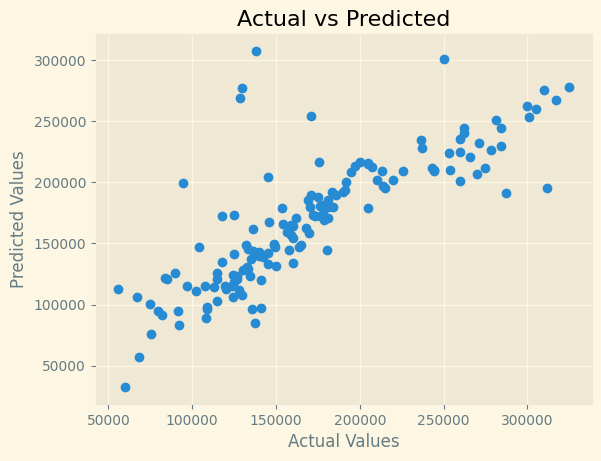

In [48]:
# Calculate R-squared on the test set
r_squared = regression_model.score(X_test,y_test)
print(f"R-squared on Test Set: {r_squared}")

r_squared_train = regression_model.score(featuresTrain, y_train)
print(f"R-squared on Training Set: {r_squared_train}")

# Create a DataFrame for unstandardized predictions against actual values
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions_test})

# Scatter plot
plt.scatter(predictions_df['Actual'], predictions_df['Predicted'])
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

R-squared (Ridge Regression) on Test Set: 0.6502113434790154
Root Mean Squared Error (Ridge Regression) on Test Set: 37023.4167
R-squared (Random Forest Regression) on Test Set: 0.7637996117340755
Root Mean Squared Error (Random Forest Regression) on Test Set: 30423.8337


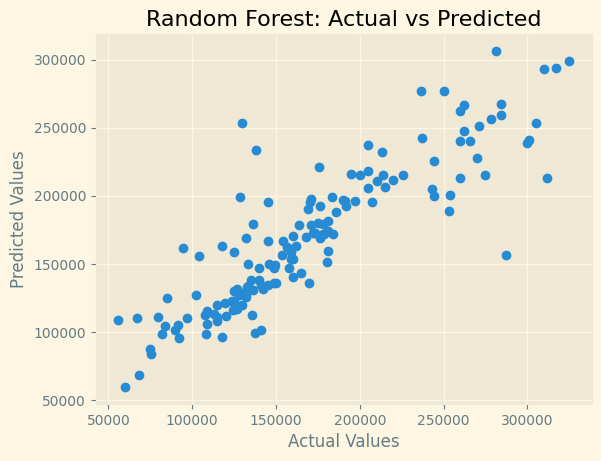

In [49]:
# Ridge Regression
ridge_model = Ridge()
ridge_model.fit(featuresTrain, y_train)

# Random Forest Regression
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(featuresTrain, y_train)

# Evaluate Ridge Regression
r_squared_ridge = ridge_model.score(X_test, y_test)
print(f"R-squared (Ridge Regression) on Test Set: {r_squared_ridge}")

# Make predictions on the test set
y_pred = ridge_model.predict(X_test)
# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Display the performance metrics
print(f"Root Mean Squared Error (Ridge Regression) on Test Set: {rmse:.4f}")


# Evaluate Random Forest Regression
predictions_rf = rf_model.predict(X_test)
r_squared_rf = rf_model.score(X_test, y_test)
print(f"R-squared (Random Forest Regression) on Test Set: {r_squared_rf}")

# Calculate RMSE
rmse = mean_squared_error(y_test, predictions_rf , squared=False)
# Display the performance metrics
print(f"Root Mean Squared Error (Random Forest Regression) on Test Set: {rmse:.4f}")


# Create a DataFrame for Random Forest unstandardized predictions against actual values
predictions_rf_df = pd.DataFrame({'Actual': y_test, 'Predicted_RF': predictions_rf})

# Scatter plot for Random Forest
plt.scatter(predictions_rf_df['Actual'], predictions_rf_df['Predicted_RF'])
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

<i><b> Among all the models tried, Random Forest seems to be significantly better than the others. Let's try Hyperparamter tuning </i></b>

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
R-squared (Best Random Forest) on Test Set: 0.7602446390919257
Root Mean Squared Error (Random Forest Regression) on Test Set: 30651.9281


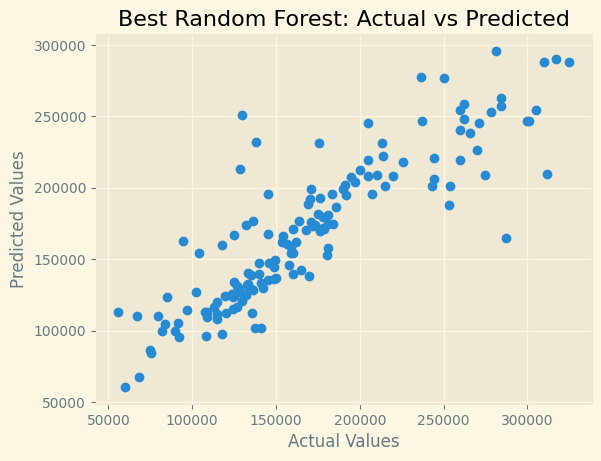

In [51]:
# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest Regressor
rf_model_tuned = RandomForestRegressor(random_state=42)

# Perform Grid Search to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_model_tuned, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(featuresTrain, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model from Grid Search
best_rf_model = grid_search.best_estimator_

# Evaluate the performance of the best model on the test set
predictions_best_rf = best_rf_model.predict(X_test)
r_squared_best_rf = best_rf_model.score(X_test, y_test)
print(f"R-squared (Best Random Forest) on Test Set: {r_squared_best_rf}")

# Calculate RMSE
rmse = mean_squared_error(y_test, predictions_best_rf , squared=False)
# Display the performance metrics
print(f"Root Mean Squared Error (Random Forest Regression) on Test Set: {rmse:.4f}")


# Create a DataFrame for the best Random Forest unstandardized predictions against actual values
predictions_best_rf_df = pd.DataFrame({'Actual': y_test, 'Predicted_Best_RF': predictions_best_rf})

# Scatter plot for the best Random Forest
plt.scatter(predictions_best_rf_df['Actual'], predictions_best_rf_df['Predicted_Best_RF'])
plt.title('Best Random Forest: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [52]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


<b> AutoGluon </b>